In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Orioles players

orioles_data = master_data.loc[master_data["Franchise"] == "Orioles"]

#Only showing players that signed with the Orioles

signed_orioles_data = orioles_data.loc[orioles_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_orioles_data.groupby("Year")

#Unsigned Orioles draft picks

unsigned_orioles_data = orioles_data.loc[orioles_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1973    59.6
1978    54.7
1967    47.5
1999    39.2
2007    36.8
1990    31.7
1987    31.2
2010    30.7
1997    22.3
2012    21.1
2003    19.9
1979    19.1
1989    19.0
1968    18.1
1991    14.7
1988    14.3
2011    13.4
1974    11.7
2001    11.3
2008     9.9
2013     9.2
2006     9.0
1992     8.3
1996     6.2
2002     5.5
1982     5.5
2009     5.5
2005     5.2
1969     4.9
1975     3.9
1985     3.9
2004     3.6
1971     3.4
2014     2.1
1980     2.0
1995     1.7
1993     1.6
1966     1.4
1984     1.0
1972     1.0
1965     0.5
2000     0.3
2016     0.2
1977     0.1
1986     0.1
1983     0.0
2018     0.0
1998     0.0
2017     0.0
2019     0.0
1970    -0.2
1976    -0.6
1994    -0.6
1981    -0.8
2015    -1.1
Name: Total_WAR, dtype: float64

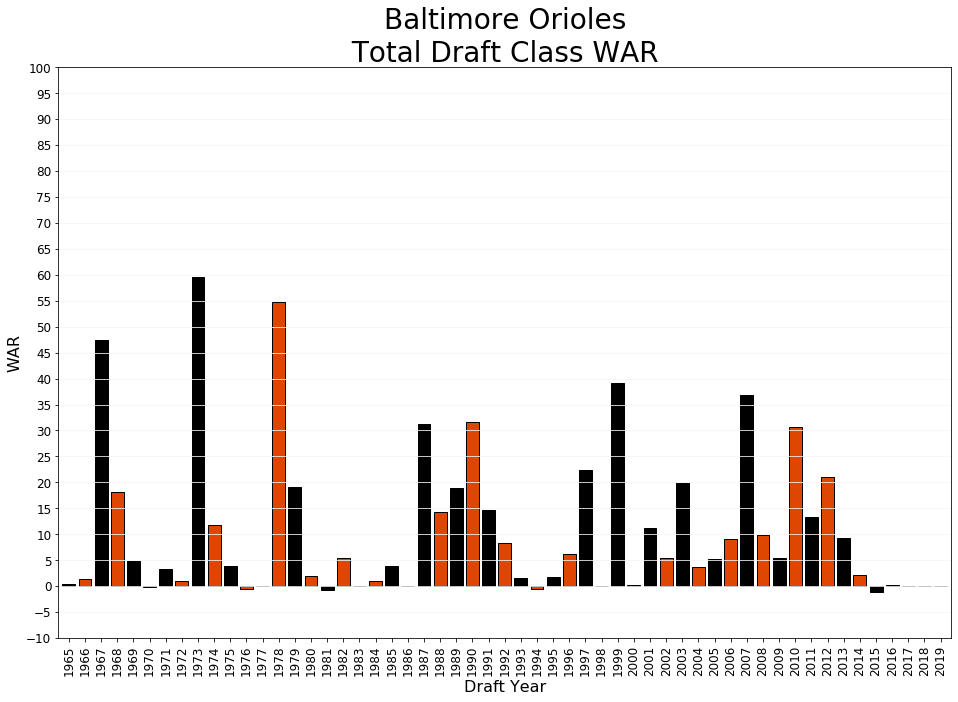

In [13]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#000000", "#DF4601"], width = .8, fontsize = 12, edgecolor = "#000000", figsize = (16, 10.5))
plt.title("Baltimore Orioles\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 101, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Orioles WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_orioles_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
10751,1978,2,48,Orioles,Orioles,Y,Cal Ripken Jr.,1981.0,ripkeca01,1010978.0,38.2,0.0,38.2,3B,HS,Aberdeen HS,Aberdeen,MD,More than 25 WAR
1673,1967,1,19,Orioles,Orioles,Y,Bobby Grich,1970.0,grichbo01,1005033.0,33.6,0.0,33.6,SS,HS,Woodrow Wilson HS,Long Beach,CA,More than 25 WAR
7165,1973,3,63,Orioles,Orioles,Y,Eddie Murray,1977.0,murraed02,1009386.0,32.7,0.0,32.7,C,HS,Locke HS,Los Angeles,CA,More than 25 WAR
53177,2010,1,3,Orioles,Orioles,Y,Manny Machado,2012.0,machama01,11493.0,30.1,0.0,30.1,SS,HS,Brito Miami Private School,Miami,FL,More than 25 WAR
22463,1990,1,20,Orioles,Orioles,Y,Mike Mussina,1991.0,mussimi01,837.0,0.0,29.1,29.1,RHP,4Yr,Stanford University,Palo Alto,CA,More than 25 WAR
42722,2003,1,7,Orioles,Orioles,Y,Nick Markakis,2006.0,markani01,5930.0,20.2,0.0,20.2,OF,JC,Young Harris College,Young Harris,GA,20-25 WAR
7262,1973,7,159,Orioles,Orioles,Y,Mike Flanagan,1975.0,flanami01,1004133.0,0.0,20.1,20.1,LHP,4Yr,University of Massachusetts Amherst,Amherst,MA,20-25 WAR
48855,2007,5,159,Orioles,Orioles,Y,Jake Arrieta,2010.0,arrieja01,4153.0,1.4,18.3,19.7,RHP,4Yr,Texas Christian University,Fort Worth,TX,15-20 WAR
36872,1999,1,50,Orioles,Orioles,Y,Brian Roberts,2001.0,roberbr01,166.0,19.6,0.0,19.6,SS,4Yr,University of South Carolina,Columbia,SC,15-20 WAR
11657,1979,7,175,Orioles,Orioles,Y,Storm Davis,1982.0,davisst02,1003080.0,-0.1,19.0,18.9,RHP,HS,University Christian HS,Jacksonville,FL,15-20 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_orioles_data.loc[((signed_orioles_data["WAR Group"] == "Less than 5 WAR") |
(signed_orioles_data["WAR Group"] == "No Major League Experience")) & 
(signed_orioles_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
14,1965,1,15,Orioles,Orioles,Y,Scott McDonald,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Marquette HS,Yakima,WA,No Major League Experience
839,1966,1,16,Orioles,Orioles,Y,Ted Parks,NaN,NaN,NaN,NaN,NaN,NaN,SS,4Yr,University of California Berkeley,Berkeley,CA,No Major League Experience
2639,1968,1,10,Orioles,Orioles,Y,Junior Kennedy,1974.0,kenneju01,1006845.0,3.2,0.0,3.2,SS,HS,Arvin HS,Arvin,CA,Less than 5 WAR
3558,1969,1,17,Orioles,Orioles,Y,Don Hood,1973.0,hooddo01,1005994.0,0.0,4.1,4.1,LHP,HS,Southside HS,Florence,SC,Less than 5 WAR
4607,1970,1,24,Orioles,Orioles,Y,James West,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Vashon HS,St. Louis,MO,No Major League Experience
5533,1971,1,23,Orioles,Orioles,Y,Randy Stein,1978.0,steinra02,1012471.0,0.0,-0.6,-0.6,RHP,HS,Ganesha HS,Pomona,CA,Less than 5 WAR
6335,1972,1,24,Orioles,Orioles,Y,Ken Thomas,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Clear Fork HS,Bellville,OH,No Major League Experience
8559,1975,1,23,Orioles,Orioles,Y,Dave Ford,1978.0,fordda02,1004217.0,0.0,0.6,0.6,RHP,HS,Lincoln West HS,Cleveland,OH,Less than 5 WAR
9235,1976,1,20,Orioles,Orioles,Y,Dallas Williams,1981.0,willida05,1013986.0,-0.6,0.0,-0.6,OF,HS,Abraham Lincoln HS,Brooklyn,NY,Less than 5 WAR
9947,1977,1,19,Orioles,Orioles,Y,Drungo Hazewood,1980.0,hazewdr01,1005539.0,-0.1,0.0,-0.1,C,HS,Sacramento HS,Sacramento,CA,Less than 5 WAR


In [9]:
#Best unsigned draft picks in franchise history

unsigned_orioles_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
18530,1987,11,273,Orioles,Orioles,N,Mike Mussina,1991.0,mussimi01,837.0,0.0,29.1,29.1,RHP,HS,Montoursville HS,Montoursville,PA,More than 25 WAR
4423,1969,40,884,Orioles,Orioles,N,Dave Winfield,1973.0,winfida01,1014127.0,25.6,0.0,25.6,RHP,HS,St. Paul Central HS,St. Paul,MN,More than 25 WAR
3323,1968,31,695,Orioles,Orioles,N,Bill Bonham,1971.0,bonhabi01,1001165.0,-0.3,19.0,18.7,RHP,JC,Los Angeles Valley College,Los Angeles,CA,15-20 WAR
12247,1979,31,765,Orioles,Orioles,N,Glenn Davis,1984.0,davisgl01,1003052.0,18.0,0.0,18.0,1B,HS,University Christian HS,Jacksonville,FL,15-20 WAR
4012,1969,20,473,Orioles,Orioles,N,Dick Ruthven,1973.0,ruthvdi01,1011330.0,0.4,16.2,16.6,RHP,HS,Irvington HS,Fremont,CA,15-20 WAR
2052,1967,20,398,Orioles,Orioles,N,Doug Rau,1972.0,raudo01,1010717.0,0.2,16.1,16.3,LHP,HS,Columbus HS,Columbus,TX,15-20 WAR
35986,1998,20,609,Orioles,Orioles,N,Cliff Lee,2002.0,leecl02,1636.0,-0.2,14.9,14.7,LHP,JC,Meridian Community College,Meridian,MS,10-15 WAR
29360,1994,25,699,Orioles,Orioles,N,Michael Young,2000.0,youngmi02,1286.0,13.9,0.0,13.9,OF,HS,Bishop Amat Memorial HS,La Puente,CA,10-15 WAR
20231,1988,28,711,Orioles,Orioles,N,Joey Hamilton,1994.0,hamiljo02,328.0,-0.6,13.8,13.2,RHP,HS,Statesboro HS,Statesboro,GA,10-15 WAR
12265,1979,32,783,Orioles,Orioles,N,Kevin Gross,1983.0,grosske01,1005088.0,0.8,11.7,12.5,RHP,HS,Fillmore HS,Fillmore,CA,10-15 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_orioles_data.loc[signed_orioles_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
18582,1987,13,325,Orioles,Orioles,Y,Steve Finley,1989.0,finlest01,54.0,16.4,0.0,16.4,OF,4Yr,Southern Illinois University Carbondale,Carbondale,IL,15-20 WAR
2866,1968,11,238,Orioles,Orioles,Y,Al Bumbry,1972.0,bumbral01,1001649.0,10.5,0.0,10.5,OF,4Yr,Virginia State University,Petersburg,VA,10-15 WAR
55484,2011,26,785,Orioles,Orioles,Y,Zach Davies,2015.0,davieza02,13183.0,-0.2,7.8,7.6,RHP,HS,Mesquite HS,Gilbert,AZ,5-10 WAR
34115,1997,11,345,Orioles,Orioles,Y,Jerry Hairston,1998.0,hairsje02,144.0,6.8,0.0,6.8,SS,4Yr,Southern Illinois University Carbondale,Carbondale,IL,5-10 WAR
56811,2012,19,582,Orioles,Orioles,Y,Josh Hader,2017.0,haderjo01,14212.0,0.0,6.0,6.0,LHP,HS,Old Mill HS,Millersville,MD,5-10 WAR
32473,1996,15,441,Orioles,Orioles,Y,Josh Towers,2001.0,towerjo01,1489.0,-0.2,6.0,5.8,RHP,JC,Oxnard College,Oxnard,CA,5-10 WAR
26021,1992,18,492,Orioles,Orioles,Y,Garrett Stephenson,1996.0,stephga01,1185.0,-1.0,5.2,4.2,RHP,4Yr,Brigham Young University-Idaho,Rexburg,ID,Less than 5 WAR
21276,1989,13,323,Orioles,Orioles,Y,Mike Oquist,1993.0,oquismi01,1009828.0,0.0,3.7,3.7,RHP,4Yr,University of Arkansas,Fayetteville,AR,Less than 5 WAR
59014,2014,11,331,Orioles,Orioles,Y,John Means,2018.0,meansjo01,16269.0,0.2,3.0,3.2,LHP,4Yr,West Virginia University,Morgantown,WV,Less than 5 WAR
21380,1989,17,427,Orioles,Orioles,Y,Gregg Zaun,1995.0,zaungr01,580.0,3.2,0.0,3.2,C,HS,St. Francis HS,Pasadena,CA,Less than 5 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(orioles_data["Year"], orioles_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1965,51.5,45.6,2.9
1966,34.0,59.6,6.4
1967,12.5,76.6,10.9
1968,18.4,65.3,16.3
1969,12.5,81.2,6.2
1970,21.4,67.9,10.7
1971,9.5,83.3,7.1
1972,14.0,76.7,9.3
1973,28.6,64.3,7.1


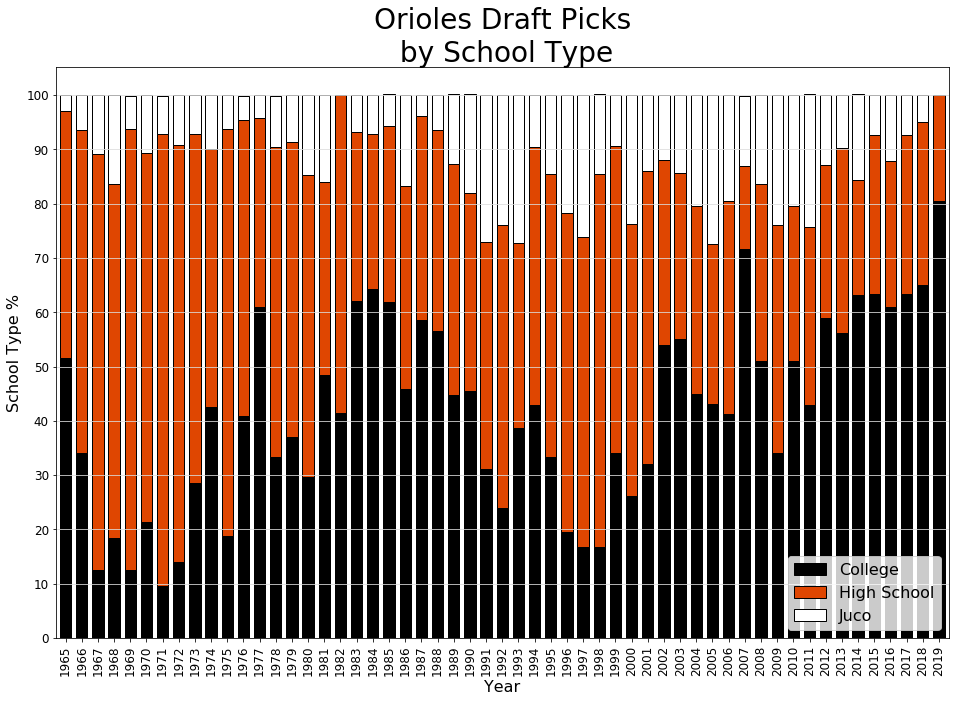

In [12]:
#Bar chart of table above

colors = ["#000000", "#DF4601", "white"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#000000", stacked = True, figsize = (16, 10.5))
plt.title("Orioles Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "gainsboro", linestyle = "-", axis = "y")
plt.savefig("Orioles Draft Picks by School Type.png")
plt.show()